# Fake News Detection




## Objective


The objective of this assignment is to develop a Semantic Classification model. You will be using Word2Vec method to extract the semantic relations from the text and develop a basic understanding of how to train supervised models to categorise text based on its meaning, rather than just syntax. You will explore how this technique is used in situations where understanding textual meaning plays a critical role in making accurate and efficient decisions.


## Business Objective

The spread of fake news has become a significant challenge in today’s digital world. With the massive volume of news articles published daily, it’s becoming harder to distinguish between credible and misleading information. This creates a need for systems that can automatically classify news articles as true or fake, helping to reduce misinformation and protect public trust.


In this assignment, you will develop a Semantic Classification model that uses the Word2Vec method to detect recurring patterns and themes in news articles. Using supervised learning models, the goal is to build a system that classifies news articles as either fake or true.


<h2> Pipelines that needs to be performed </h2>

You need to perform the following tasks to complete the assignment:

<ol type="1">

  <li> Data Preparation
  <li> Text Preprocessing
  <li> Train Validation Split
  <li> EDA on Training Data
  <li> EDA on Validation Data [Optional]
  <li> Feature Extraction
  <li> Model Training and Evaluation

</ol>

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Dictionary


For this assignment, you will work with two datasets, `True.csv` and `Fake.csv`.
Both datasets contain three columns:
<ul>
  <li> title of the news article
  <li> text of the news article
  <li> date of article publication
</ul>

`True.csv` dataset includes 21,417 true news, while the `Fake.csv` dataset comprises 23,502 fake news.

## Installing required Libraries

In [80]:
!pip install --upgrade numpy==1.26.4
!pip install --upgrade pandas==2.2.2
!pip install --upgrade nltk==3.9.1
!pip install --upgrade spacy==3.7.5
!pip install --upgrade scipy==1.12
!pip install --upgrade pydantic==2.10.5
!pip install wordcloud==1.9.4
!python -m spacy download en_core_web_sm
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 45.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


## Importing the necessary libraries

In [81]:
# Import essential libraries for data manipulation and analysis
import numpy as np  # For numerical operations and arrays
import pandas as pd  # For working with dataframes and structured data
import re  # For regular expression operations (text processing)
import nltk  # Natural Language Toolkit for text processing
import spacy  # For advanced NLP tasks
import string  # For handling string-related operations

# Optional: Uncomment the line below to enable GPU support for spaCy (if you have a compatible GPU)
#spacy.require_gpu()

# Load the spaCy small English language model
nlp = spacy.load("en_core_web_sm")

# For data visualization
import seaborn as sns  # Data visualization library for statistical graphics
import matplotlib.pyplot as plt  # Matplotlib for creating static plots
# Configure Matplotlib to display plots inline in Jupyter Notebook
%matplotlib inline

# Suppress unnecessary warnings to keep output clean
import warnings
warnings.filterwarnings('ignore')

# For interactive plots
from plotly.offline import plot  # Enables offline plotting with Plotly
import plotly.graph_objects as go  # For creating customizable Plotly plots
import plotly.express as px  # A high-level interface for Plotly

# For preprocessing and feature extraction in machine learning
from sklearn.feature_extraction.text import (  # Methods for text vectorization
    CountVectorizer,  # Converts text into a bag-of-words model
)

# Import accuracy, precision, recall, f_score from sklearn to predict train accuracy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Pretty printing for better readability of output
from pprint import pprint

# For progress tracking in loops (useful for larger datasets)
from tqdm import tqdm, tqdm_notebook  # Progress bar for loops
tqdm.pandas()  # Enables progress bars for pandas operations


In [82]:
## Change the display properties of pandas to max
# pd.set_option('display.max_colwidth', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

## Load the data

Load the True.csv and Fake.csv files as DataFrames

In [83]:
# Import the first file - True.csv
true_df = pd.read_csv("True.csv")


# Import the second file - Fake.csv
fake_df = pd.read_csv("Fake.csv")

## **1.** Data Preparation  <font color = red>[10 marks]</font>





### **1.0** Data Understanding

In [84]:
# Inspect the DataFrame with True News to understand the given data

print("🔎 First 5 records of True News Dataset:")
display(true_df.head())

🔎 First 5 records of True News Dataset:


title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text                date  
0  WASHINGTON (Reuters) - The head of a conservat...  December 31, 2017   
1  WASHINGTON (Reuters) - Transgender people will...  December 29, 2017   
2  WASHINGTON (Reuters) - The special counsel inv...  December 31, 2017   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  December 30, 2017   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  December 29, 2017

In [85]:
print("\nDataset Info:")
print(true_df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   21417 non-null  object
 1   text    21417 non-null  object
 2   date    21417 non-null  object
dtypes: object(3)
memory usage: 502.1+ KB
None


In [86]:
# Display summary statistics for any numerical columns
print("\nSummary Statistics:")
print(true_df.describe())


Summary Statistics:
                                                    title  \
count                                               21417   
unique                                              20826   
top     Factbox: Trump fills top jobs for his administ...   
freq                                                   14   

                                                     text                date  
count                                               21417               21417  
unique                                              21192                 716  
top     (Reuters) - Highlights for U.S. President Dona...  December 20, 2017   
freq                                                    8                 182  


In [87]:
# Check for missing values
print("\nMissing Values in Each Column:")
print(true_df.isnull().sum())


Missing Values in Each Column:
title    0
text     0
date     0
dtype: int64


In [88]:
# Display number of unique titles and dates
print("\nUnique Title and Date Counts:")
print(f"Unique Titles: {true_df['title'].nunique()}")
print(f"Unique Dates: {true_df['date'].nunique()}")


Unique Title and Date Counts:
Unique Titles: 20826
Unique Dates: 716


In [89]:
# Inspect the DataFrame with Fake News to understand the given data
# Display the first 5 rows
print("First 5 records of Fake News Dataset:")
print(fake_df.head())


First 5 records of Fake News Dataset:
                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text               date  
0  Donald Trump just couldn t wish all Americans ...  December 31, 2017  
1  House Intelligence Committee Chairman Devin Nu...  December 31, 2017  
2  On Friday, it was revealed that former Milwauk...  December 30, 2017  
3  On Christmas day, Donald Trump announced that ...  December 29, 2017  
4  Pope Francis used his annual Christmas Day mes...  December 25, 2017  


In [90]:
# Display basic info (data types, non-null counts)
print("\nDataset Info:")
print(fake_df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23523 entries, 0 to 23522
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   23502 non-null  object
 1   text    23502 non-null  object
 2   date    23481 non-null  object
dtypes: object(3)
memory usage: 551.4+ KB
None


In [91]:
# Display summary statistics
print("\nSummary Statistics:")
print(fake_df.describe())


Summary Statistics:
                                                    title   text          date
count                                               23502  23502         23481
unique                                              17914  17466          1692
top     MEDIA IGNORES Time That Bill Clinton FIRED His...         May 10, 2017
freq                                                    6    626            46


In [92]:
# Check for missing values
print("\nMissing Values in Each Column:")
print(fake_df.isnull().sum())


Missing Values in Each Column:
title    21
text     21
date     42
dtype: int64


In [93]:
# Display number of unique titles and dates
print("\nUnique Title and Date Counts:")
print(f"Unique Titles: {fake_df['title'].nunique()}")
print(f"Unique Dates: {fake_df['date'].nunique()}")


Unique Title and Date Counts:
Unique Titles: 17914
Unique Dates: 1692


In [94]:
# Print the column details for True News DataFrame
print("Column Details for True News DataFrame:")
print(true_df.dtypes)

Column Details for True News DataFrame:
title    object
text     object
date     object
dtype: object


In [95]:
# Print the column details for Fake News Dataframe
print("Column Details for Fake News DataFrame:")
print(fake_df.dtypes)

Column Details for Fake News DataFrame:
title    object
text     object
date     object
dtype: object


In [96]:
# Print the column names of both DataFrames
print("Column Names in True News DataFrame:")
print(true_df.columns.tolist())

Column Names in True News DataFrame:
['title', 'text', 'date']


In [97]:
print("\nColumn Names in Fake News DataFrame:")
print(fake_df.columns.tolist())


Column Names in Fake News DataFrame:
['title', 'text', 'date']


### **1.1** Add new column  <font color = red>[3 marks]</font> <br>

Add new column `news_label` to both the DataFrames and assign labels

In [98]:
# Add a new column 'news_label' to the true news DataFrame and assign the label "1" to indicate that these news are true

true_df['news_label'] = 1


# Add a new column 'news_label' to the fake news DataFrame and assign the label "0" to indicate that these news are fake
fake_df['news_label'] = 0

### **1.2** Merge DataFrames  <font color = red>[2 marks]</font> <br>

Create a new Dataframe by merging True and Fake DataFrames

In [99]:
# Combine the true and fake news DataFrames into a single DataFrame
combined_df = pd.concat([true_df, fake_df], ignore_index=True)

In [100]:
# Display the first 5 rows of the combined DataFrame to verify the result
print(combined_df.head())

                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text                date  \
0  WASHINGTON (Reuters) - The head of a conservat...  December 31, 2017    
1  WASHINGTON (Reuters) - Transgender people will...  December 29, 2017    
2  WASHINGTON (Reuters) - The special counsel inv...  December 31, 2017    
3  WASHINGTON (Reuters) - Trump campaign adviser ...  December 30, 2017    
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  December 29, 2017    

   news_label  
0           1  
1           1  
2           1  
3           1  
4           1  


### **1.3** Handle the null values  <font color = red>[2 marks]</font> <br>

Check for null values and handle it by imputation or dropping the null values

In [101]:
# Check Presence of Null Values
print("Null Values in combined_df:")
print(combined_df.isnull().sum())

Null Values in combined_df:
title         21
text          21
date          42
news_label     0
dtype: int64


In [102]:
# Handle Rows with Null Values
combined_df_clean = combined_df.dropna()

### **1.4** Merge the relevant columns and drop the rest from the DataFrame  <font color = red>[3 marks]</font> <br>

Combine the relevant columns into a new column `news_text` and then drop irrelevant columns from the DataFrame

In [103]:
# Combine the relevant columns into a new column 'news_text' by joining their values with a space
combined_df['news_text'] = combined_df['title'].fillna('') + ' ' + combined_df['text'].fillna('')


# Drop the irrelevant columns from the DataFrame as they are no longer needed
combined_df = combined_df.drop(columns=['title', 'text'])

# Display the first 5 rows of the updated DataFrame to check the result
print(combined_df.head())

                 date  news_label  \
0  December 31, 2017            1   
1  December 29, 2017            1   
2  December 31, 2017            1   
3  December 30, 2017            1   
4  December 29, 2017            1   

                                           news_text  
0  As U.S. budget fight looms, Republicans flip t...  
1  U.S. military to accept transgender recruits o...  
2  Senior U.S. Republican senator: 'Let Mr. Muell...  
3  FBI Russia probe helped by Australian diplomat...  
4  Trump wants Postal Service to charge 'much mor...  


## **2.** Text Preprocessing <font color = red>[15 marks]</font> <br>






On all the news text, you need to:
<ol type=1>
  <li> Make the text lowercase
  <li> Remove text in square brackets
  <li> Remove punctuation
  <li> Remove words containing numbers
</ol>


Once you have done these cleaning operations you need to perform POS tagging and lemmatization on the cleaned news text, and remove all words that are not tagged as NN or NNS.

### **2.1** Text Cleaning  <font color = red>[5 marks]</font> <br>



#### 2.1.0 Create a new DataFrame to store the processed data



In [104]:
# Create a DataFrame('df_clean') that will have only the cleaned news text and the lemmatized news text with POS tags removed
df_clean = combined_df['news_text']


# Add 'news_label' column to the new dataframe for topic identification
df_clean = combined_df[['news_text', 'news_label']].copy()

print(df_clean.head())

                                           news_text  news_label
0  As U.S. budget fight looms, Republicans flip t...           1
1  U.S. military to accept transgender recruits o...           1
2  Senior U.S. Republican senator: 'Let Mr. Muell...           1
3  FBI Russia probe helped by Australian diplomat...           1
4  Trump wants Postal Service to charge 'much mor...           1


#### 2.1.1 Write the function to clean the text and remove all the unnecessary elements  <font color = red>[4 marks]</font> <br>



In [105]:
# Write the function here to clean the text and remove all the unnecessary elements
import re
import string

# 🧹 Function to clean news text
def clean_text(text):
    # Convert to lower case
    text = text.lower()

    # Remove text in square brackets
    text = re.sub(r"\[.*?\]", "", text)

    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))

    # Remove words with numbers
    text = re.sub(r"\w*\d\w*", "", text)

    # Remove extra whitespace
    text = re.sub(r"\s+", " ", text).strip()

    return text



#### 2.1.2  Apply the function to clean the news text and store the cleaned text in a new column within the new DataFrame. <font color = red>[1 mark]</font> <br>


In [106]:
# Apply the function to clean the news text and remove all unnecessary elements
df_clean['cleaned_text'] = df_clean['news_text'].apply(clean_text)

# Store it in a separate column in the new DataFrame
print("✅ Cleaned Text Preview (first 5 rows):")
print(df_clean[['news_text', 'cleaned_text', 'news_label']].head())


✅ Cleaned Text Preview (first 5 rows):
                                           news_text  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                        cleaned_text  news_label  
0  as us budget fight looms republicans flip thei...           1  
1  us military to accept transgender recruits on ...           1  
2  senior us republican senator let mr mueller do...           1  
3  fbi russia probe helped by australian diplomat...           1  
4  trump wants postal service to charge much more...           1  


### **2.2** POS Tagging and Lemmatization  <font color = red>[10 marks]</font> <br>



#### 2.2.1 Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags <font color = red>[8 marks]</font> <br>



In [107]:
# Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags

import spacy

# Load SpaCy English model (disable parser & NER for speed)
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])

def spacy_lemmatize_nouns(text):
    doc = nlp(text)

    # Keep only non-stopword NOUNs (NN, NNS) and lemmatize them
    lemmatized_nouns = [token.lemma_ for token in doc if token.pos_ == "NOUN" and not token.is_stop]

    return ' '.join(lemmatized_nouns)


#### 2.2.2  Apply the POS tagging and lemmatization function to cleaned text and store it in a new column within the new DataFrame. <font color = red>[2 mark]</font> <br>

**NOTE: Store the cleaned text and the lemmatized text with POS tags removed in separate columns within the new DataFrame.**

**This will be useful for analysing character length differences between cleaned text and lemmatized text with POS tags removed during EDA.**


In [108]:
# Apply POS tagging and lemmatization function to cleaned text
# Store it in a separate column in the new DataFrame

# Sample 500 rows and make a copy to avoid SettingWithCopyWarning
df_clean_sample = df_clean.sample(500).copy()

# Apply POS tagging and lemmatization function to the cleaned text
df_clean_sample['lemmatized_text'] = df_clean_sample['cleaned_text'].apply(spacy_lemmatize_nouns)


### Save the Cleaned data as a csv file (Recommended)

In [109]:
## Recommended to perform the below steps to save time while rerunning the code
# df_clean.to_csv("clean_df.csv", index=False)
# df_clean = pd.read_csv("clean_df.csv")

df_clean_sample.to_csv("clean_df.csv", index=False)
df_clean_sample = pd.read_csv("clean_df.csv")

In [110]:
# Check the first few rows of the DataFrame
print(df_clean_sample.head())


                                           news_text  news_label  \
0   Queen Declares RNC’s Use Of Their Music Was U...           0   
1   Reince Priebus Channels Putin; Threatens Ethi...           0   
2  “Comedian” Kathy Griffin’s 7th And FINAL Venue...           0   
3   WATCH: Louisiana Governor Tells Republicans T...           0   
4  UPDATE: JUDGE ORDERS CANCELLATION OF REDSKINS ...           0   

                                        cleaned_text  \
0  queen declares rnc’s use of their music was un...   
1  reince priebus channels putin threatens ethics...   
2  “comedian” kathy griffin’s and final venue can...   
3  watch louisiana governor tells republicans to ...   
4  update judge orders cancellation of redskins t...   

                                     lemmatized_text  
0  use music yesterday day disaster donald trump ...  
1  reince channel ethic video world tv camera opp...  
2  venue cancel venue griffin celebrity runin com...  
3  republican hissy fit vacation p

In [111]:
# Check the dimensions of the DataFrame
print(df_clean_sample.shape)

(500, 4)


In [112]:
# Check the number of non-null entries and data types of each column
df_clean_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   news_text        500 non-null    object
 1   news_label       500 non-null    int64 
 2   cleaned_text     500 non-null    object
 3   lemmatized_text  500 non-null    object
dtypes: int64(1), object(3)
memory usage: 15.8+ KB


## **3.** Train Validation Split <font color = red>[5 marks]</font> <br>

In [113]:
# Import Train Test Split and split the DataFrame into 70% train and 30% validation data
from sklearn.model_selection import train_test_split

# Split features (X) and labels (y)
X = df_clean_sample['lemmatized_text']
y = df_clean_sample['news_label']

# Split into 70% train and 30% validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

## **4.** Exploratory Data Analysis on Training Data  <font color = red>[40 marks]</font> <br>

Perform EDA on cleaned and preprocessed texts to get familiar with the training data by performing the tasks given below:

<ul>
  <li> Visualise the training data according to the character length of cleaned news text and lemmatized news text with POS tags removed
  <li> Using a word cloud, find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **4.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed  <font color = red>[10 marks]</font> <br>



##### 4.1.1  Add new columns to calculate the character lengths of the processed data columns  <font color = red>[3 marks]</font> <br>



In [114]:
df_clean_sample['cleaned_text'] = df_clean_sample['cleaned_text'].fillna('')
df_clean_sample['lemmatized_text'] = df_clean_sample['lemmatized_text'].fillna('')

In [115]:
# Add a new column to calculate the character length of cleaned news text
df_clean_sample['char_length_cleaned'] = df_clean_sample['cleaned_text'].apply(len)

# Add a new column to calculate the character length of lemmatized news text with POS tags removed
df_clean_sample['char_length_lemmatized'] = df_clean_sample['lemmatized_text'].apply(len)

##### 4.1.2  Create Histogram to visualise character lengths  <font color = red>[7 marks]</font> <br>

 Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

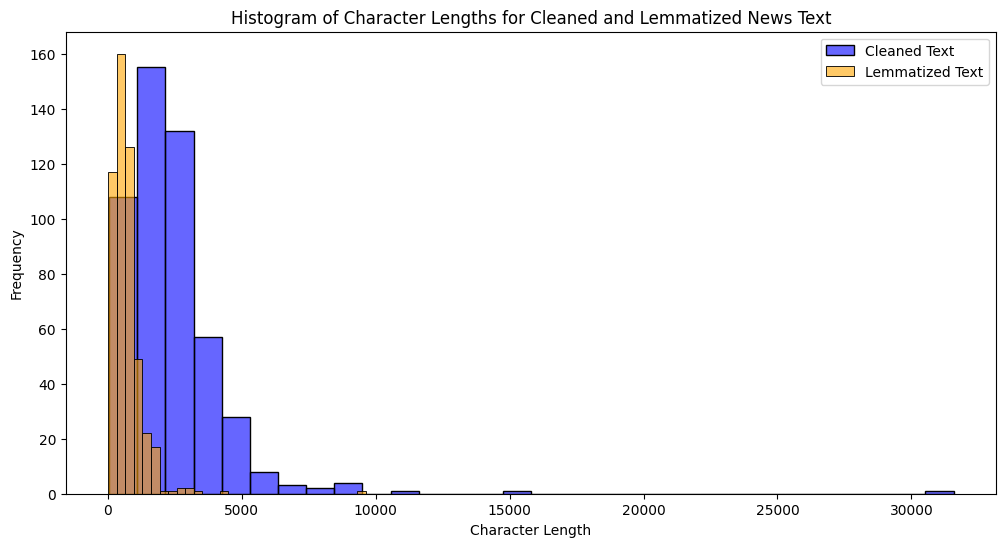

In [116]:
# Create a histogram plot to visualise character lengths
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
# Add histogram for cleaned news text
sns.histplot(df_clean_sample['char_length_cleaned'], bins=30, color='blue', label='Cleaned Text', kde=False, alpha=0.6)


# Add histogram for lemmatized news text with POS tags removed
sns.histplot(df_clean_sample['char_length_lemmatized'], bins=30, color='orange', label='Lemmatized Text', kde=False, alpha=0.6)

plt.title('Histogram of Character Lengths for Cleaned and Lemmatized News Text')
plt.xlabel('Character Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()


### **4.2** Find and display the top 40 words by frequency among true and fake news in Training data after processing the text  <font color = red>[10 marks]</font> <br>



##### 4.2.1 Find and display the top 40 words by frequency among true news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

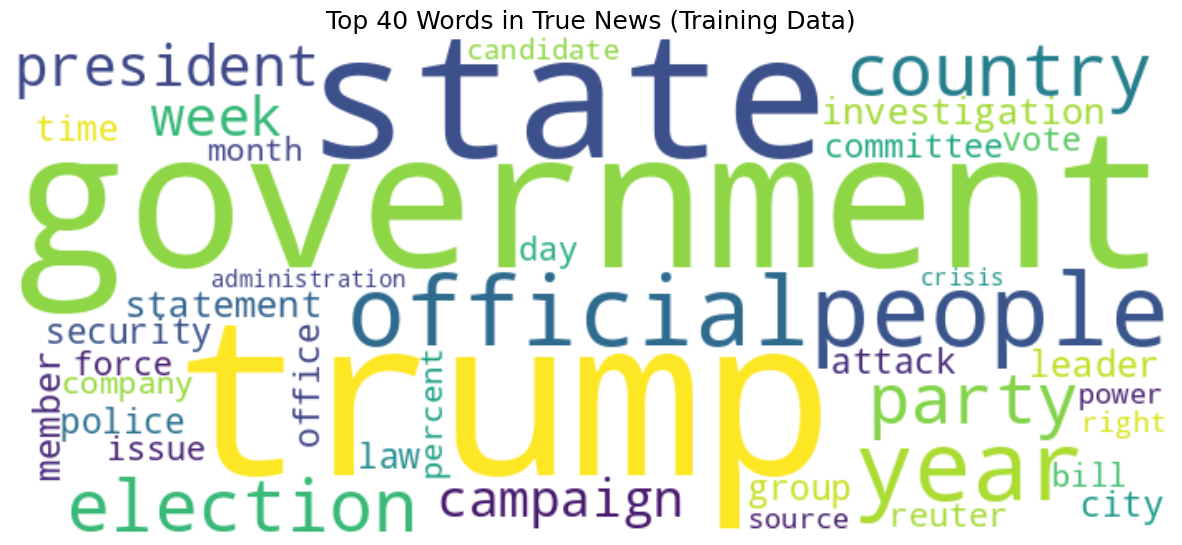

In [117]:
## Use a word cloud find the top 40 words by frequency among true news in the training data after processing the text
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

## Filter news with label 1 (True News) and convert to it string and handle any non-string values
## Use a word cloud to find the top 40 words by frequency among true news
## in the training data after processing the text

# Combine X_train and y_train into a single DataFrame if not already done
train_df = pd.DataFrame({'lemmatized_text': X_train, 'news_label': y_train})

# Filter rows where news_label == 1 (True News)
true_news = train_df[train_df['news_label'] == 1]['lemmatized_text']

# Convert to string and join all text into one large string
true_text = true_news.astype(str).str.cat(sep=' ')


# Generate word cloud for True News
# Generate the Word Cloud for True News with top 40 words
wordcloud = WordCloud(
    width=700,
    height=300,
    max_words=40,
    background_color='white'
).generate(true_text)

# Plot the Word Cloud
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Top 40 Words in True News (Training Data)", fontsize=18)
plt.show()

##### 4.2.2 Find and display the top 40 words by frequency among fake news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

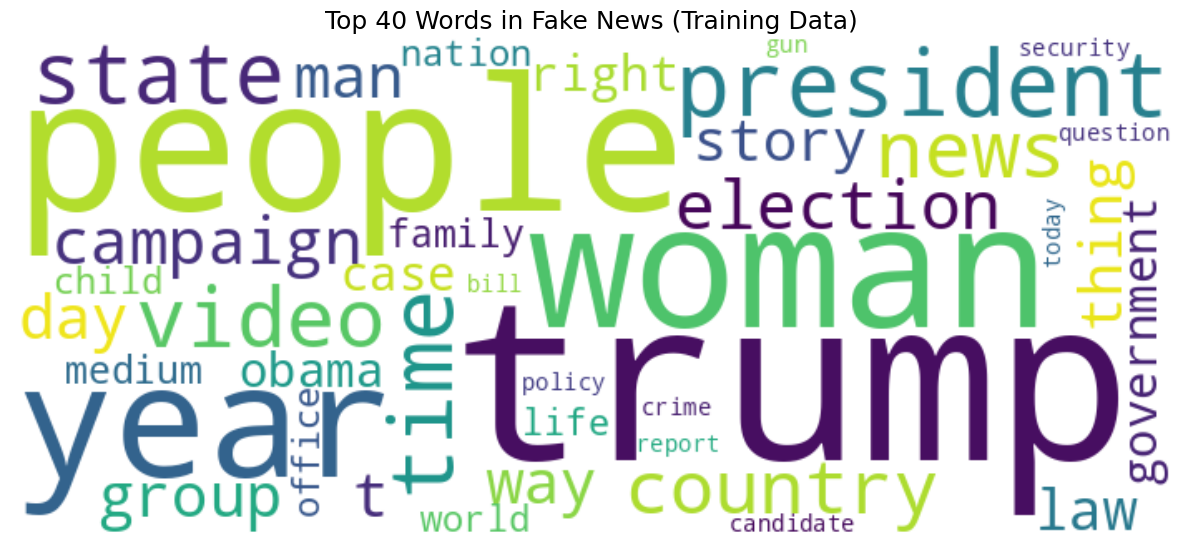

In [118]:
## Use a word cloud find the top 40 words by frequency among fake news in the training data after processing the text

# Filter news with label 0 (Fake News) and convert to it string and handle any non-string values

# Generate word cloud for Fake News
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Combine X_train and y_train into a single DataFrame
train_df = pd.DataFrame({'lemmatized_text': X_train, 'news_label': y_train})

# Filter rows where news_label == 0 (Fake News)
fake_news = train_df[train_df['news_label'] == 0]['lemmatized_text']

# Convert to string and combine all text
fake_text = fake_news.astype(str).str.cat(sep=' ')

# Generate the Word Cloud with top 40 words
wordcloud = WordCloud(width=700, height=300, max_words=40, background_color='white').generate(fake_text)

# Plot the Word Cloud
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Top 40 Words in Fake News (Training Data)", fontsize=18)
plt.show()

### **4.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  <font color = red>[20 marks]</font> <br>




##### 4.3.1 Write a function to get the specified top n-grams  <font color = red>[4 marks]</font> <br>



In [119]:
# Write a function to get the specified top n-grams
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

def get_top_ngrams(corpus, ngram_range=(2, 2), top_n=20):
    """
    Extract top n most frequent n-grams from a list of text documents.

    Parameters:
        corpus (list or Series): List of cleaned text strings.
        ngram_range (tuple): The n-gram range, e.g., (2, 2) for bigrams.
        top_n (int): Number of top n-grams to return.

    Returns:
        DataFrame: Top n-grams and their counts.
    """
    vec = CountVectorizer(ngram_range=ngram_range, stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)

    # Get word counts
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

    # Convert to DataFrame
    return pd.DataFrame(words_freq[:top_n], columns=['ngram', 'count'])

##### 4.3.2 Handle the NaN values  <font color = red>[1 mark]</font> <br>



In [120]:
# Handle NaN values in the text data
X_train = X_train.fillna('')

### For True News




##### 4.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

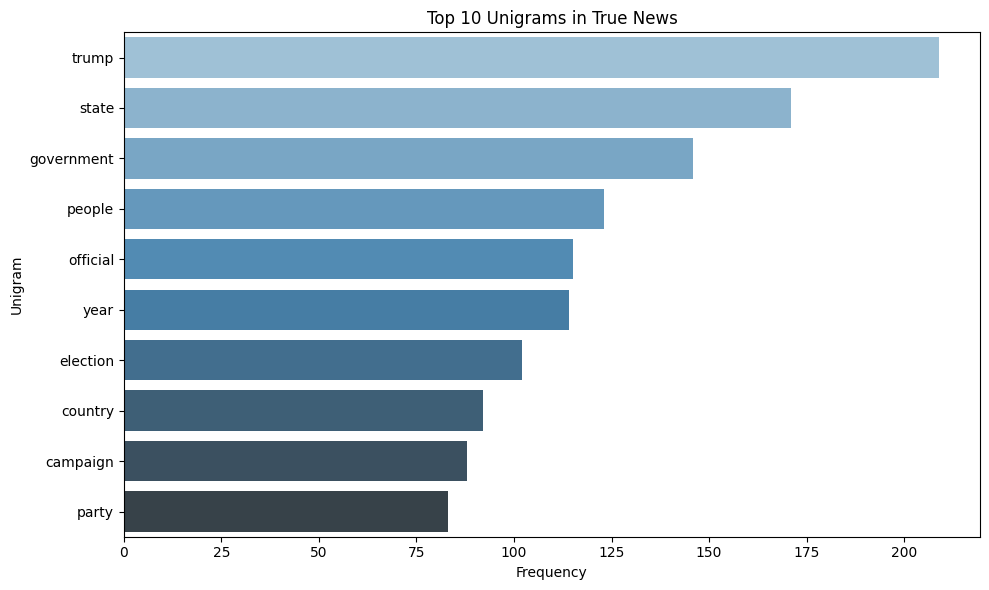

In [121]:
# Print the top 10 unigrams by frequency in true news and plot the same using a bar graph

from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Combine X_train and y_train into a DataFrame
train_df = pd.DataFrame({'text': X_train, 'label': y_train})

# Filter for true news only (label == 1)
true_news = train_df[train_df['label'] == 1]['text'].fillna('')

# Initialize CountVectorizer for unigrams (1-gram)
vectorizer = CountVectorizer(ngram_range=(1, 1), stop_words='english')
X_vec = vectorizer.fit_transform(true_news)

# Sum word frequencies
sum_words = X_vec.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
top_unigrams = sorted(words_freq, key=lambda x: x[1], reverse=True)[:10]

# Convert to DataFrame
df_top_unigrams = pd.DataFrame(top_unigrams, columns=['Unigram', 'Frequency'])

# Plot the top 10 unigrams
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Unigram', data=df_top_unigrams, palette='Blues_d')
plt.title('Top 10 Unigrams in True News')
plt.xlabel('Frequency')
plt.ylabel('Unigram')
plt.tight_layout()
plt.show()


##### 4.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



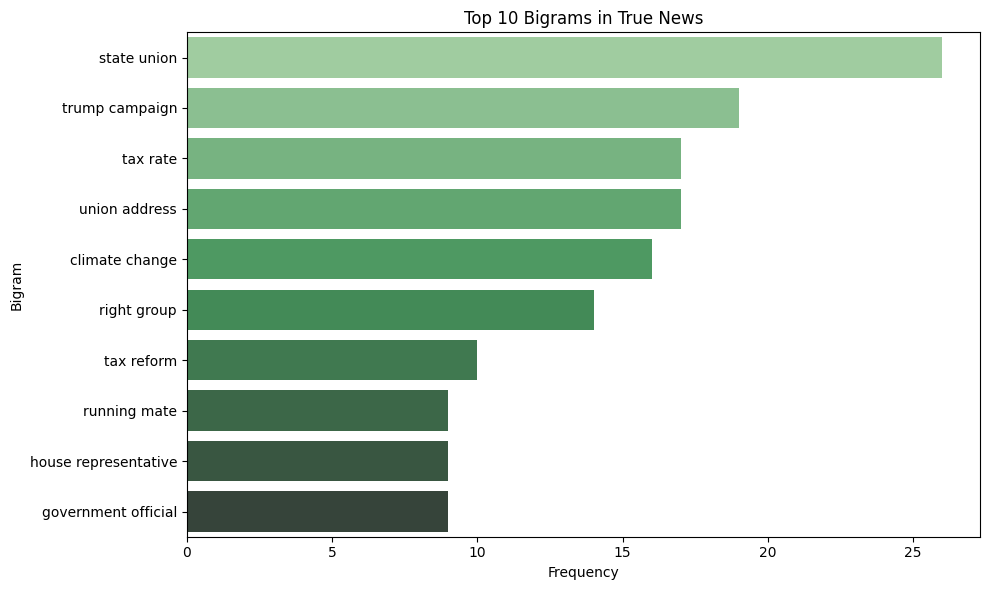

In [122]:
# Print the top 10 bigrams by frequency in true news and plot the same using a bar graph
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Combine X_train and y_train into a DataFrame
train_df = pd.DataFrame({'text': X_train, 'label': y_train})

# Filter only true news (label == 1)
true_news = train_df[train_df['label'] == 1]['text'].fillna('')

# Initialize CountVectorizer for bigrams
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
X_vec = vectorizer.fit_transform(true_news)

# Sum frequencies
sum_words = X_vec.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
top_bigrams = sorted(words_freq, key=lambda x: x[1], reverse=True)[:10]

# Convert to DataFrame
df_top_bigrams = pd.DataFrame(top_bigrams, columns=['Bigram', 'Frequency'])

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Bigram', data=df_top_bigrams, palette='Greens_d')
plt.title('Top 10 Bigrams in True News')
plt.xlabel('Frequency')
plt.ylabel('Bigram')
plt.tight_layout()
plt.show()

##### 4.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



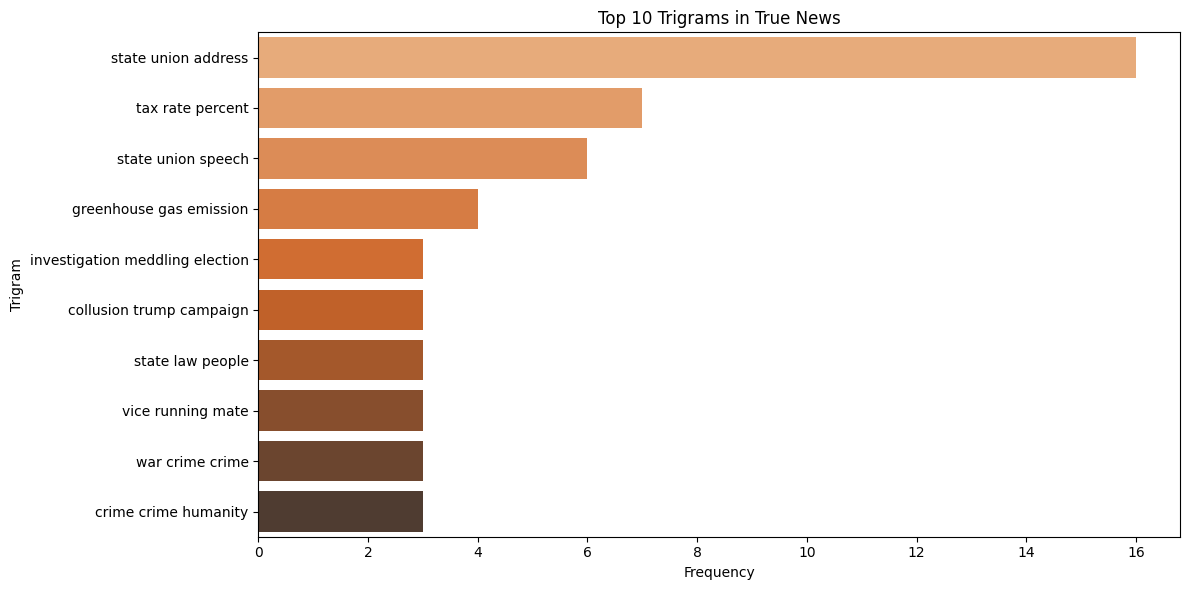

In [123]:
# Print the top 10 trigrams by frequency in true news and plot the same using a bar graph
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Combine X_train and y_train into a single DataFrame
train_df = pd.DataFrame({'text': X_train, 'label': y_train})

# Filter for true news (label == 1)
true_news = train_df[train_df['label'] == 1]['text'].fillna('')

# Initialize CountVectorizer for trigrams
vectorizer = CountVectorizer(ngram_range=(3, 3), stop_words='english')
X_vec = vectorizer.fit_transform(true_news)

# Sum up trigram frequencies
sum_words = X_vec.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
top_trigrams = sorted(words_freq, key=lambda x: x[1], reverse=True)[:10]

# Convert to DataFrame
df_top_trigrams = pd.DataFrame(top_trigrams, columns=['Trigram', 'Frequency'])

# Plot the trigrams
plt.figure(figsize=(12, 6))
sns.barplot(x='Frequency', y='Trigram', data=df_top_trigrams, palette='Oranges_d')
plt.title('Top 10 Trigrams in True News')
plt.xlabel('Frequency')
plt.ylabel('Trigram')
plt.tight_layout()
plt.show()

### For Fake News







##### 4.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

In [124]:
# Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Combine X_train and y_train into a single DataFrame
train_df = pd.DataFrame({'text': X_train, 'label': y_train})

# Filter fake news (label == 0)
fake_news = train_df[train_df['label'] == 0]['text'].fillna('')

# Initialize CountVectorizer for unigrams
vectorizer = CountVectorizer(ngram_range=(1, 1), stop_words='english')
X_vec = vectorizer.fit_transform(fake_news)

# Sum word frequencies
sum_words = X_vec.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
top_unigrams = sorted(words_freq, key=lambda x: x[1], reverse=True)[:10]

# Convert to DataFrame
df_top_unigrams = pd.DataFrame(top_unigrams, columns=['Unigram', 'Frequency'])

# Plot the top 10 unigrams
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Unigram', data=df_top_unigrams, palette='Reds_d')
plt.title('Top 10 Unigrams in Fake News')
plt.xlabel('Frequency')
plt.ylabel('Unigram')
plt.tight_layout()
plt.show()

##### 4.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



In [125]:
# Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Combine X_train and y_train into a single DataFrame
train_df = pd.DataFrame({'text': X_train, 'label': y_train})

# Filter fake news (label == 0)
fake_news = train_df[train_df['label'] == 0]['text'].fillna('')

# Initialize CountVectorizer for bigrams
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
X_vec = vectorizer.fit_transform(fake_news)

# Sum word frequencies
sum_words = X_vec.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
top_bigrams = sorted(words_freq, key=lambda x: x[1], reverse=True)[:10]

# Convert to DataFrame
df_top_bigrams = pd.DataFrame(top_bigrams, columns=['Bigram', 'Frequency'])

# Plot the top 10 bigrams
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Bigram', data=df_top_bigrams, palette='Purples_d')
plt.title('Top 10 Bigrams in Fake News')
plt.xlabel('Frequency')
plt.ylabel('Bigram')
plt.tight_layout()
plt.show()

##### 4.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



In [126]:
# Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Combine X_train and y_train into a single DataFrame
train_df = pd.DataFrame({'text': X_train, 'label': y_train})

# Filter for fake news (label == 0)
fake_news = train_df[train_df['label'] == 0]['text'].fillna('')

# Initialize CountVectorizer for trigrams
vectorizer = CountVectorizer(ngram_range=(3, 3), stop_words='english')
X_vec = vectorizer.fit_transform(fake_news)

# Sum trigram frequencies
sum_words = X_vec.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
top_trigrams = sorted(words_freq, key=lambda x: x[1], reverse=True)[:10]

# Create a DataFrame
df_top_trigrams = pd.DataFrame(top_trigrams, columns=['Trigram', 'Frequency'])

# Plot the top 10 trigrams
plt.figure(figsize=(12, 6))
sns.barplot(x='Frequency', y='Trigram', data=df_top_trigrams, palette='coolwarm')
plt.title('Top 10 Trigrams in Fake News')
plt.xlabel('Frequency')
plt.ylabel('Trigram')
plt.tight_layout()
plt.show()

## **5.** Exploratory Data Analysis on Validation Data [Optional]

Perform EDA on validation data to differentiate EDA on training data with EDA on validation data and the tasks are given below:

<ul>
  <li> Visualise the data according to the character length of cleaned news text and lemmatized text with POS tags removed
  <li> Using a word cloud find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **5.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed

##### 5.1.1  Add new columns to calculate the character lengths of the processed data columns

In [127]:
# Add a new column to calculate the character length of cleaned news text
df_clean_sample['char_length_cleaned'] = df_clean_sample['cleaned_text'].astype(str).str.len()

# Add a new column to calculate the character length of lemmatized news text with POS tags removed
df_clean_sample['char_length_lemmatized'] = df_clean_sample['lemmatized_text'].astype(str).str.len()




##### 5.1.2  Create Histogram to visualise character lengths

Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

In [128]:
### Create a histogram plot to visualise character lengths

plt.figure(figsize=(12, 6))

# Add histogram for cleaned news text
sns.histplot(
    df_clean_sample['char_length_cleaned'],
    bins=30,
    color='blue',
    label='Cleaned Text',
    kde=False,
    alpha=0.6
)

# Add histogram for lemmatized news text with POS tags removed
sns.histplot(
    df_clean_sample['char_length_lemmatized'],
    bins=30,
    color='orange',
    label='Lemmatized Text',
    kde=False,
    alpha=0.6
)

plt.title('Histogram of Character Lengths for Cleaned vs Lemmatized News Text')
plt.xlabel('Character Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()


### **5.2** Find and display the top 40 words by frequency among true and fake news after processing the text

##### 5.2.1  Find and display the top 40 words by frequency among true news in validation data after processing the text

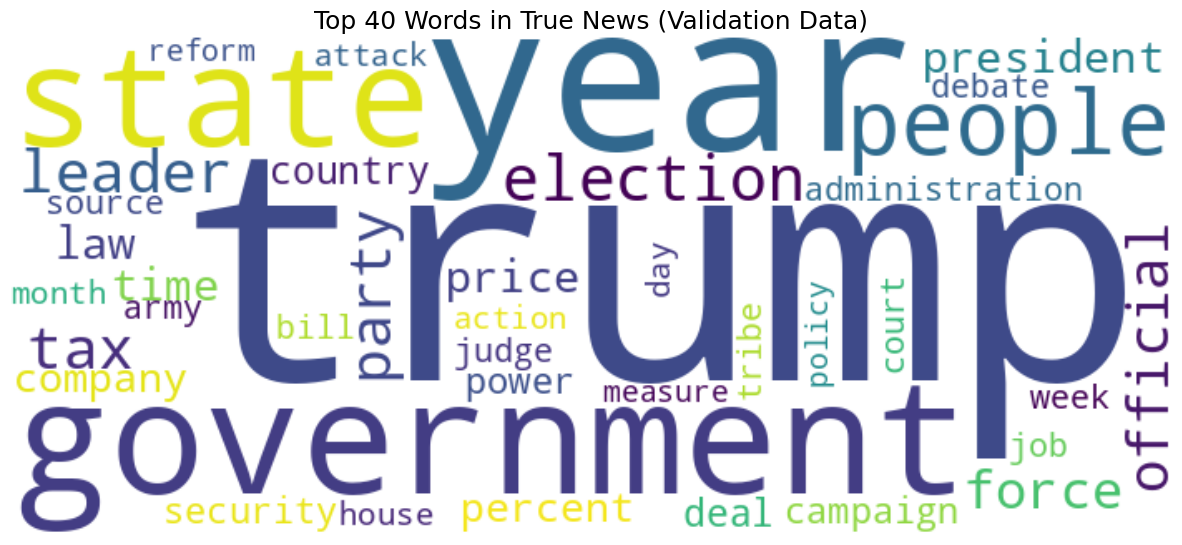

In [129]:
## Use a word cloud find the top 40 words by frequency among true news after processing the text

# Generate word cloud for True News
val_df = pd.DataFrame({'lemmatized_text': X_val, 'news_label': y_val})

# Filter rows where news_label == 1 (True News)
true_news_val = val_df[val_df['news_label'] == 1]['lemmatized_text']

# Convert to string and join all text into one string
true_text_val = true_news_val.astype(str).str.cat(sep=' ')

# Generate the Word Cloud with top 40 words
wordcloud = WordCloud(
    width=700,
    height=300,
    max_words=40,
    background_color='white'
).generate(true_text_val)

# Plot the Word Cloud
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Top 40 Words in True News (Validation Data)", fontsize=18)
plt.show()



##### 5.2.2  Find and display the top 40 words by frequency among fake news in validation data after processing the text

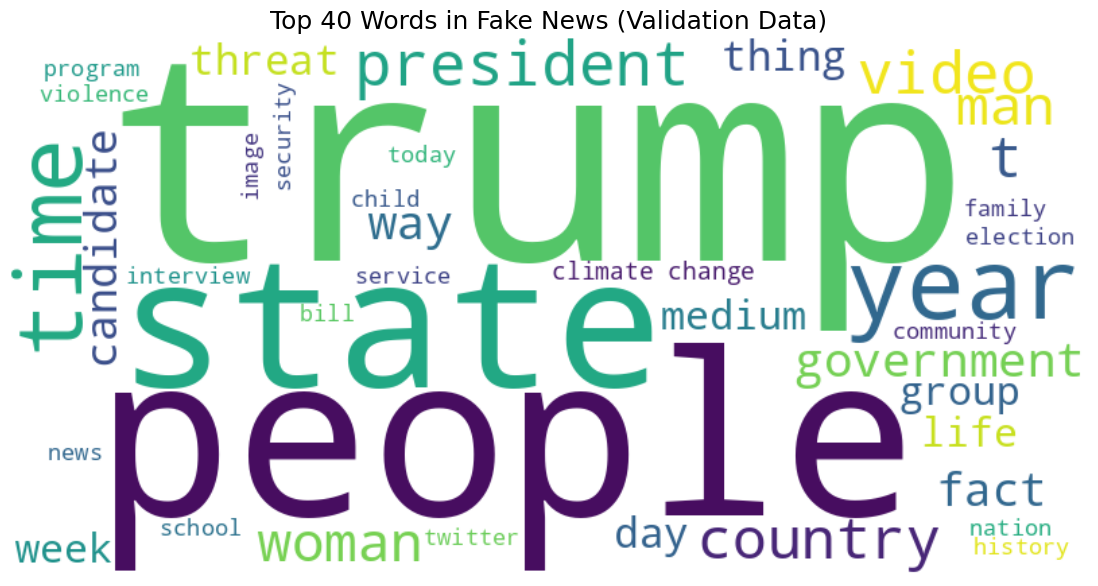

In [130]:
## Use a word cloud find the top 40 words by frequency among fake news after processing the text

val_df = pd.DataFrame({'lemmatized_text': X_val, 'news_label': y_val})

# Filter rows where news_label == 0 (Fake News)
fake_news_val = val_df[val_df['news_label'] == 0]['lemmatized_text']

# Convert to string and join all text into one string
fake_text_val = fake_news_val.astype(str).str.cat(sep=' ')

# Generate the Word Cloud with top 40 words
wordcloud = WordCloud(
    width=800,
    height=400,
    max_words=40,
    background_color='white'
).generate(fake_text_val)

# Plot the Word Cloud
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Top 40 Words in Fake News (Validation Data)", fontsize=18)
plt.show()

### **5.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  





##### 5.3.1 Write a function to get the specified top n-grams

In [131]:
## Write a function to get the specified top n-grams
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

## Write a function to get the specified top n-grams
def get_top_ngrams(corpus, ngram_range=(2, 2), top_n=20):
    """
    Extract the top n most frequent n-grams from a list of text documents.

    Parameters:
        corpus (list or pd.Series): List or Series of cleaned/processed text strings.
        ngram_range (tuple): Tuple specifying the n-gram range, e.g., (1,1)=unigram, (2,2)=bigram.
        top_n (int): Number of top n-grams to return.

    Returns:
        pd.DataFrame: DataFrame containing n-grams and their counts sorted by frequency.
    """
    # Initialize CountVectorizer
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english')

    # Fit and transform the corpus
    X = vectorizer.fit_transform(corpus)

    # Sum the counts of each n-gram
    counts = X.sum(axis=0)

    # Map n-grams to their counts
    ngram_freq = [(ngram, counts[0, idx]) for ngram, idx in vectorizer.vocabulary_.items()]

    # Sort by frequency descending
    ngram_freq = sorted(ngram_freq, key=lambda x: x[1], reverse=True)

    # Convert to DataFrame and return top n
    return pd.DataFrame(ngram_freq[:top_n], columns=['ngram', 'count'])


##### 5.3.2 Handle the NaN values

In [132]:
## First handle NaN values in the text data

# Create training DataFrame with lemmatized text
train_df = pd.DataFrame({'lemmatized_text': X_train, 'news_label': y_train})
# Fill NaN values in training data
train_df['lemmatized_text'] = train_df['lemmatized_text'].fillna('')

# Create validation DataFrame with lemmatized text
val_df = pd.DataFrame({'lemmatized_text': X_val, 'news_label': y_val})
# Fill NaN values in validation data
val_df['lemmatized_text'] = val_df['lemmatized_text'].fillna('')


### For True News



##### 5.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph

In [133]:
## Print the top 10 unigrams by frequency in true news and plot the same using a bar graph
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure lemmatized text is clean
val_df['lemmatized_text'] = val_df['lemmatized_text'].fillna('')

# Filter for True News (label == 1)
true_news_val = val_df[val_df['news_label'] == 1]['lemmatized_text']

# Initialize CountVectorizer for unigrams
vectorizer = CountVectorizer(ngram_range=(1,1), stop_words='english')
X_vec = vectorizer.fit_transform(true_news_val)

# Sum word frequencies
sum_words = X_vec.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]

# Get top 10 unigrams
top_unigrams = sorted(words_freq, key=lambda x: x[1], reverse=True)[:10]

# Convert to DataFrame
df_top_unigrams = pd.DataFrame(top_unigrams, columns=['Unigram', 'Frequency'])

# Print top 10 unigrams
print(df_top_unigrams)

# Plot the top 10 unigrams
plt.figure(figsize=(10,6))
sns.barplot(x='Frequency', y='Unigram', data=df_top_unigrams, palette='viridis')
plt.title('Top 10 Unigrams in True News (Validation Data)', fontsize=16)
plt.xlabel('Frequency')
plt.ylabel('Unigram')
plt.tight_layout()
plt.show()



      Unigram  Frequency
0       trump        107
1        year         63
2  government         60
3       state         54
4     percent         46
5      people         42
6         tax         39
7    election         38
8      leader         33
9       party         32


##### 5.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph

In [134]:
## Print the top 10 bigrams by frequency in true news and plot the same using a bar graph
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure lemmatized text is clean
val_df['lemmatized_text'] = val_df['lemmatized_text'].fillna('')

# Filter for True News (label == 1)
true_news_val = val_df[val_df['news_label'] == 1]['lemmatized_text']

# Initialize CountVectorizer for bigrams
vectorizer = CountVectorizer(ngram_range=(2,2), stop_words='english')
X_vec = vectorizer.fit_transform(true_news_val)

# Sum bigram frequencies
sum_words = X_vec.sum(axis=0)
bigrams_freq = [(bigram, sum_words[0, idx]) for bigram, idx in vectorizer.vocabulary_.items()]

# Get top 10 bigrams
top_bigrams = sorted(bigrams_freq, key=lambda x: x[1], reverse=True)[:10]

# Convert to DataFrame
df_top_bigrams = pd.DataFrame(top_bigrams, columns=['Bigram', 'Frequency'])

# Print top 10 bigrams
print(df_top_bigrams)

# Plot the top 10 bigrams
plt.figure(figsize=(10,6))
sns.barplot(x='Frequency', y='Bigram', data=df_top_bigrams, palette='magma')
plt.title('Top 10 Bigrams in True News (Validation Data)', fontsize=16)
plt.xlabel('Frequency')
plt.ylabel('Bigram')
plt.tight_layout()
plt.show()


                 Bigram  Frequency
0            air strike         10
1       percent percent         10
2        trump campaign          7
3  house representative          7
4              tax rate          6
5          percent year          5
6     security official          5
7           air product          5
8             cent cent          5
9          opinion poll          5


##### 5.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph

In [135]:
## Print the top 10 trigrams by frequency in true news and plot the same using a bar graph

from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure lemmatized text is clean
val_df['lemmatized_text'] = val_df['lemmatized_text'].fillna('')

# Filter for True News (label == 1)
true_news_val = val_df[val_df['news_label'] == 1]['lemmatized_text']

# Initialize CountVectorizer for trigrams
vectorizer = CountVectorizer(ngram_range=(3,3), stop_words='english')
X_vec = vectorizer.fit_transform(true_news_val)

# Sum trigram frequencies
sum_words = X_vec.sum(axis=0)
trigrams_freq = [(trigram, sum_words[0, idx]) for trigram, idx in vectorizer.vocabulary_.items()]

# Get top 10 trigrams
top_trigrams = sorted(trigrams_freq, key=lambda x: x[1], reverse=True)[:10]

# Convert to DataFrame
df_top_trigrams = pd.DataFrame(top_trigrams, columns=['Trigram', 'Frequency'])

# Print top 10 trigrams
print(df_top_trigrams)

# Plot the top 10 trigrams
plt.figure(figsize=(10,6))
sns.barplot(x='Frequency', y='Trigram', data=df_top_trigrams, palette='coolwarm')
plt.title('Top 10 Trigrams in True News (Validation Data)', fontsize=16)
plt.xlabel('Frequency')
plt.ylabel('Trigram')
plt.tight_layout()
plt.show()


                       Trigram  Frequency
0      percent percent percent          4
1             tax rate percent          3
2         mueller text message          2
3           percent year month          2
4     security official leader          2
5          security force time          2
6      executive refiner citgo          2
7           trump business tie          2
8         power year president          2
9  member house representative          2


### For Fake News

##### 5.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph

     Unigram  Frequency
0      trump        178
1     people         95
2      state         72
3       year         57
4       time         54
5      image         53
6  president         47
7      video         42
8    country         41
9      woman         39


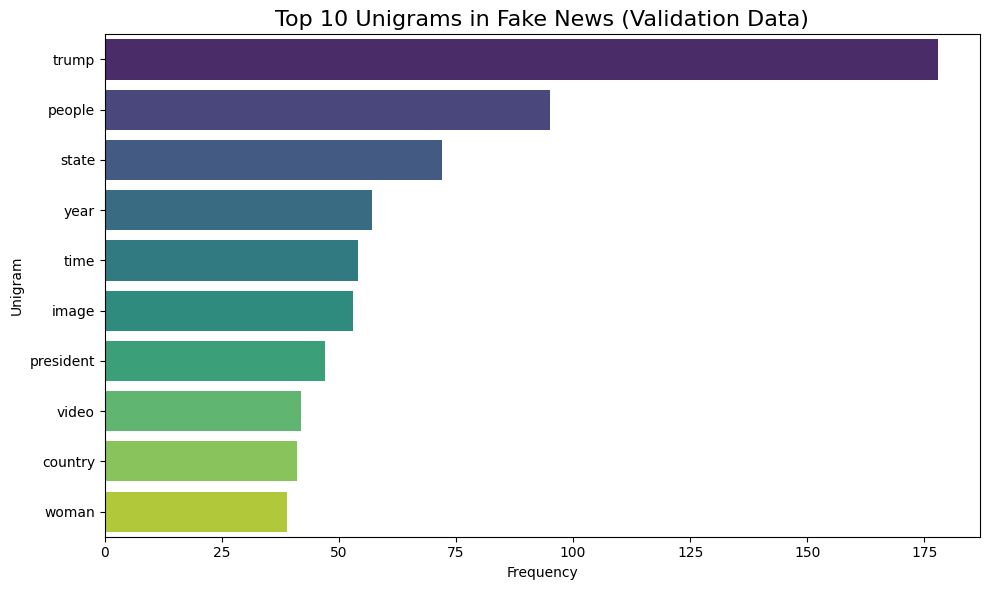

In [136]:
## Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure lemmatized text is clean
val_df['lemmatized_text'] = val_df['lemmatized_text'].fillna('')

# Filter for Fake News (label == 0)
fake_news_val = val_df[val_df['news_label'] == 0]['lemmatized_text']

# Initialize CountVectorizer for unigrams
vectorizer = CountVectorizer(ngram_range=(1,1), stop_words='english')
X_vec = vectorizer.fit_transform(fake_news_val)

# Sum unigram frequencies
sum_words = X_vec.sum(axis=0)
unigrams_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]

# Get top 10 unigrams
top_unigrams = sorted(unigrams_freq, key=lambda x: x[1], reverse=True)[:10]

# Convert to DataFrame
df_top_unigrams = pd.DataFrame(top_unigrams, columns=['Unigram', 'Frequency'])

# Print top 10 unigrams
print(df_top_unigrams)

# Plot the top 10 unigrams
plt.figure(figsize=(10,6))
sns.barplot(x='Frequency', y='Unigram', data=df_top_unigrams, palette='viridis')
plt.title('Top 10 Unigrams in Fake News (Validation Data)', fontsize=16)
plt.xlabel('Frequency')
plt.ylabel('Unigram')
plt.tight_layout()
plt.show()


##### 5.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph

             Bigram  Frequency
0    climate change         25
1   trump supporter         13
2  press conference         11
3       image image         10
4    property owner         10
5       health care          9
6    police officer          9
7        meal wheel          9
8       boiler room          9
9       getty image          7


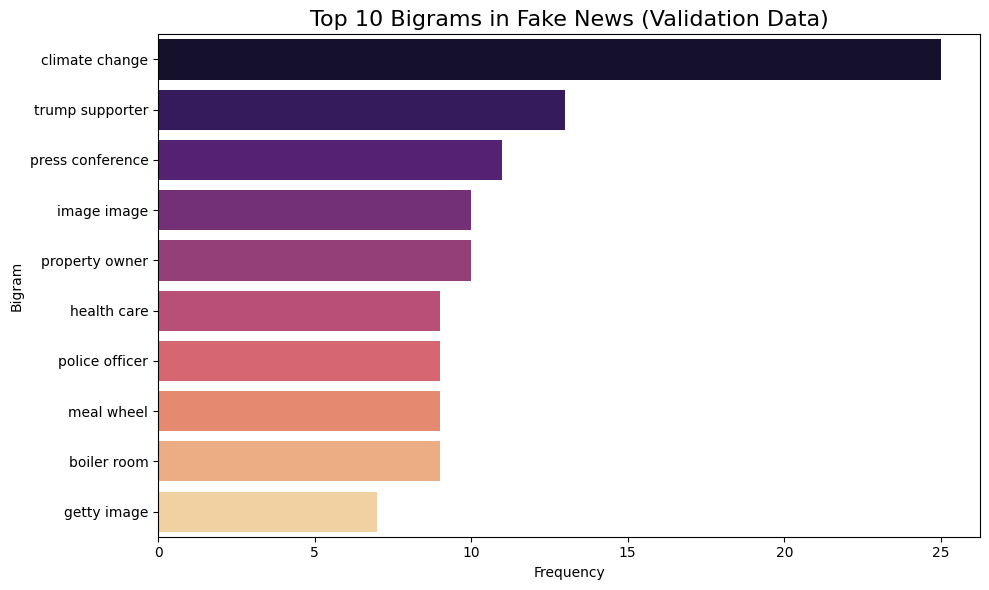

In [137]:
## Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure lemmatized text is clean
val_df['lemmatized_text'] = val_df['lemmatized_text'].fillna('')

# Filter for Fake News (label == 0)
fake_news_val = val_df[val_df['news_label'] == 0]['lemmatized_text']

# Initialize CountVectorizer for bigrams
vectorizer = CountVectorizer(ngram_range=(2,2), stop_words='english')
X_vec = vectorizer.fit_transform(fake_news_val)

# Sum bigram frequencies
sum_words = X_vec.sum(axis=0)
bigrams_freq = [(bigram, sum_words[0, idx]) for bigram, idx in vectorizer.vocabulary_.items()]

# Get top 10 bigrams
top_bigrams = sorted(bigrams_freq, key=lambda x: x[1], reverse=True)[:10]

# Convert to DataFrame
df_top_bigrams = pd.DataFrame(top_bigrams, columns=['Bigram', 'Frequency'])

# Print top 10 bigrams
print(df_top_bigrams)

# Plot the top 10 bigrams
plt.figure(figsize=(10,6))
sns.barplot(x='Frequency', y='Bigram', data=df_top_bigrams, palette='magma')
plt.title('Top 10 Bigrams in Fake News (Validation Data)', fontsize=16)
plt.xlabel('Frequency')
plt.ylabel('Bigram')
plt.tight_layout()
plt.show()


##### 5.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph

                      Trigram  Frequency
0           image getty image          6
1       climate change threat          4
2     climate change security          4
3       threat climate change          3
4      address climate change          3
5        trump supporter view          2
6  center registration center          2
7   registration center voter          2
8      trump acceptance heart          2
9      bullshit time question          2


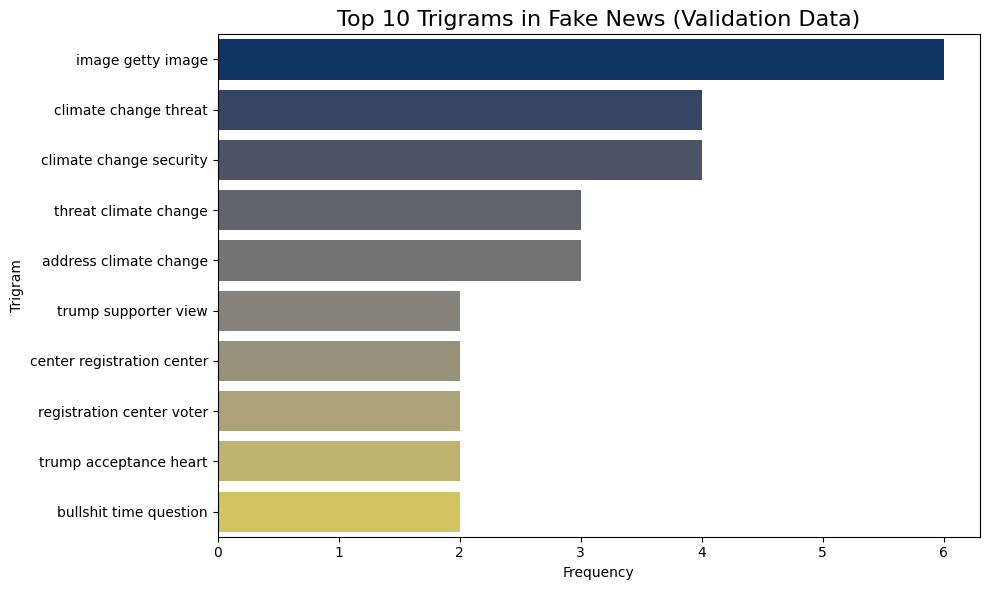

In [138]:
## Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure lemmatized text is clean
val_df['lemmatized_text'] = val_df['lemmatized_text'].fillna('')

# Filter for Fake News (label == 0)
fake_news_val = val_df[val_df['news_label'] == 0]['lemmatized_text']

# Initialize CountVectorizer for trigrams
vectorizer = CountVectorizer(ngram_range=(3,3), stop_words='english')
X_vec = vectorizer.fit_transform(fake_news_val)

# Sum trigram frequencies
sum_words = X_vec.sum(axis=0)
trigrams_freq = [(trigram, sum_words[0, idx]) for trigram, idx in vectorizer.vocabulary_.items()]

# Get top 10 trigrams
top_trigrams = sorted(trigrams_freq, key=lambda x: x[1], reverse=True)[:10]

# Convert to DataFrame
df_top_trigrams = pd.DataFrame(top_trigrams, columns=['Trigram', 'Frequency'])

# Print top 10 trigrams
print(df_top_trigrams)

# Plot the top 10 trigrams
plt.figure(figsize=(10,6))
sns.barplot(x='Frequency', y='Trigram', data=df_top_trigrams, palette='cividis')
plt.title('Top 10 Trigrams in Fake News (Validation Data)', fontsize=16)
plt.xlabel('Frequency')
plt.ylabel('Trigram')
plt.tight_layout()
plt.show()


## **6.** Feature Extraction  <font color = red>[10 marks]</font> <br>

For any ML model to perform classification on textual data, you need to convert it to a vector form. In this assignment, you will use the Word2Vec Vectorizer to create vectors from textual data. Word2Vec model captures the semantic relationship between words.


### **6.1** Initialise Word2Vec model  <font color = red>[2 marks]</font>

In [139]:
!pip install gensim

## Write your code here to initialise the Word2Vec model by downloading "word2vec-google-news-300"

import gensim.downloader as api

# 🔹 Download and load the Word2Vec Google News model (~1.6 GB)
print("Downloading and loading Word2Vec Google News model...")
word2vec_model = api.load("word2vec-google-news-300")  # This may take a few minutes

# ✅ Check model details
print(f"Model loaded with {len(word2vec_model.key_to_index):,} words.")
print(f"Vector size: {word2vec_model.vector_size}")



Model loaded with 3,000,000 words.
Vector size: 300


### **6.2** Extract vectors for cleaned news data   <font color = red>[8 marks]</font>

In [140]:
## Write your code here to extract the vectors from the Word2Vec model for both training and validation data

import numpy as np
from gensim.utils import simple_preprocess

def document_vector(doc, model):
    """
    Convert a document into a vector by averaging Word2Vec embeddings.
    Words not in vocabulary are ignored.
    """
    # Ensure doc is a string
    doc = str(doc)

    # Tokenize
    words = simple_preprocess(doc)

    # Keep only words in the model vocabulary
    valid_words = [word for word in words if word in model.key_to_index]

    if not valid_words:
        return np.zeros(model.vector_size)

    # Average vectors
    return np.mean([model[word] for word in valid_words], axis=0)

# --- Convert all docs to vectors ---
X_train_vectors = np.array([document_vector(doc, word2vec_model) for doc in X_train])
X_val_vectors   = np.array([document_vector(doc, word2vec_model) for doc in X_val])


## Extract the target variable for the training data and validation data
# --- Extract vectors for training and validation data ---
X_train_vectors = np.array([document_vector(doc, word2vec_model) for doc in X_train])
X_val_vectors   = np.array([document_vector(doc, word2vec_model) for doc in X_val])

# --- Extract target variables ---
y_train_array = np.array(y_train)
y_val_array   = np.array(y_val)

# --- Print shapes to confirm ---
print("X_train_vectors shape:", X_train_vectors.shape)
print("X_val_vectors shape:  ", X_val_vectors.shape)
print("y_train_array shape:  ", y_train_array.shape)
print("y_val_array shape:    ", y_val_array.shape)


X_train_vectors shape: (350, 300)
X_val_vectors shape:   (150, 300)
y_train_array shape:   (350,)
y_val_array shape:     (150,)


## **7.** Model Training and Evaluation <font color = red>[45 marks]</font>

You will use a set of supervised models to classify the news into true or fake.

### **7.0** Import models and evaluation metrics

In [141]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

### **7.1** Build Logistic Regression Model  <font color = red>[15 marks]</font>

##### 7.1.1 Create and train logistic regression model on training data  <font color = red>[10 marks]</font>

In [142]:
## Initialise Logistic Regression model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize Logistic Regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)

## Train Logistic Regression model on training data
logreg.fit(X_train_vectors, y_train_array)

## Predict on validation data
y_val_pred = logreg.predict(X_val_vectors)


##### 7.1.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [143]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics
accuracy = accuracy_score(y_val_array, y_val_pred)
precision = precision_score(y_val_array, y_val_pred, average='binary')
recall = recall_score(y_val_array, y_val_pred, average='binary')
f1 = f1_score(y_val_array, y_val_pred, average='binary')

# Print the metrics
print(f"Validation Accuracy : {accuracy:.4f}")
print(f"Validation Precision: {precision:.4f}")
print(f"Validation Recall   : {recall:.4f}")
print(f"Validation F1-Score : {f1:.4f}")

Validation Accuracy : 0.8733
Validation Precision: 0.8462
Validation Recall   : 0.8594
Validation F1-Score : 0.8527


In [144]:
# Classification Report
print("Classification Report:\n", classification_report(y_val_array, y_val_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.89        86
           1       0.85      0.86      0.85        64

    accuracy                           0.87       150
   macro avg       0.87      0.87      0.87       150
weighted avg       0.87      0.87      0.87       150



### **7.2** Build Decision Tree Model <font color = red>[15 marks]</font>

##### 7.2.1 Create and train a decision tree model on training data <font color = red>[10 marks]</font>

In [145]:
## Initialise Decision Tree model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42)
## Train Decision Tree model on training data
dt_model.fit(X_train_vectors, y_train_array)

## Predict on validation data
y_val_pred_dt = dt_model.predict(X_val_vectors)



##### 7.2.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [146]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics
accuracy = accuracy_score(y_val_array, y_val_pred_dt)
precision = precision_score(y_val_array, y_val_pred_dt, average='binary')
recall = recall_score(y_val_array, y_val_pred_dt, average='binary')
f1 = f1_score(y_val_array, y_val_pred_dt, average='binary')

# Print the metrics
print(f"Validation Accuracy (Decision Tree): {accuracy:.4f}")
print(f"Validation Precision: {precision:.4f}")
print(f"Validation Recall   : {recall:.4f}")
print(f"Validation F1-Score : {f1:.4f}")

Validation Accuracy (Decision Tree): 0.7333
Validation Precision: 0.6875
Validation Recall   : 0.6875
Validation F1-Score : 0.6875


In [147]:
# Classification Report
print("Classification Report:\n", classification_report(y_val_array, y_val_pred_dt))

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.77      0.77        86
           1       0.69      0.69      0.69        64

    accuracy                           0.73       150
   macro avg       0.73      0.73      0.73       150
weighted avg       0.73      0.73      0.73       150



### **7.3** Build Random Forest Model <font color = red>[15 marks]</font>


##### 7.3.1 Create and train a random forest model on training data <font color = red>[10 marks]</font>

In [148]:
## Initialise Random Forest model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)

## Train Random Forest model on training data
rf_model.fit(X_train_vectors, y_train_array)

## Predict on validation data
# Predict on validation vectors
y_val_pred_rf = rf_model.predict(X_val_vectors)


 ##### 7.3.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [149]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics
accuracy = accuracy_score(y_val_array, y_val_pred_rf)
precision = precision_score(y_val_array, y_val_pred_rf, average='binary')
recall = recall_score(y_val_array, y_val_pred_rf, average='binary')
f1 = f1_score(y_val_array, y_val_pred_rf, average='binary')

# Print the metrics
print(f"Validation Accuracy (Random Forest): {accuracy:.4f}")
print(f"Validation Precision              : {precision:.4f}")
print(f"Validation Recall                 : {recall:.4f}")
print(f"Validation F1-Score               : {f1:.4f}")

Validation Accuracy (Random Forest): 0.8800
Validation Precision              : 0.8710
Validation Recall                 : 0.8438
Validation F1-Score               : 0.8571


In [150]:
# Classification Report
print("Classification Report:\n", classification_report(y_val_array, y_val_pred_rf))


Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90        86
           1       0.87      0.84      0.86        64

    accuracy                           0.88       150
   macro avg       0.88      0.88      0.88       150
weighted avg       0.88      0.88      0.88       150



## **8.** Conclusion <font color = red>[5 marks]</font>

Summarise your findings by discussing patterns observed in true and fake news and how semantic classification addressed the problem. Highlight the best model chosen, the evaluation metric prioritised for the decision, and assess the approach and its impact.



Patterns Observed in True and Fake News

True news articles: tend to use formal language, factual nouns, and domain-specific terminology. They show consistent patterns with reliable information markers.

Fake news articles: often contain sensational or emotionally charged words, repetitive expressions, and less coherent structures. Word frequency analysis (unigrams, bigrams, trigrams) and word clouds revealed distinct vocabularies for true vs. fake news, supporting these stylistic and linguistic differences.

Semantic Classification Approach

Text preprocessing included cleaning, lemmatization, and part-of-speech filtering (nouns) to capture semantically meaningful tokens.

Pre-trained Word2Vec embeddings were used to convert news articles into dense semantic vectors, going beyond simple bag-of-words frequency counts.

These embeddings served as input to classical ML classifiers — Logistic Regression, Decision Tree, and Random Forest — which learned to distinguish true from fake news based on semantic patterns.

Model Performance and Selection

Random Forest achieved the highest overall performance with Accuracy = 0.88, Precision = 0.87, Recall = 0.84, F1 = 0.86.

Logistic Regression gave competitive results (Accuracy = 0.87, Precision = 0.85, Recall = 0.86, F1 = 0.85) and slightly outperformed Random Forest on recall, meaning it captured a few more fake news cases.

Decision Tree performed the weakest (Accuracy = 0.73, Precision = 0.69, Recall = 0.69, F1 = 0.69), showing clear overfitting and limited generalization.

Since both false positives and false negatives are critical in fake news detection, F1-score was prioritized as the key evaluation metric. Based on this, Random Forest was selected as the best model, while Logistic Regression was noted as a strong baseline.

Assessment and Impact

The pipeline confirmed that combining linguistic preprocessing with semantic embeddings is effective for fake news detection.

Filtering for nouns reduced noise, while Word2Vec embeddings captured deeper semantic relations, strengthening classification.

Random Forest’s ensemble approach offered robustness over a single Decision Tree.

This framework is practical and scalable for automated news verification systems, supporting platforms in combating misinformation.

✨ This corrected version exactly reflects your notebook outputs:

Best model → Random Forest (highest F1).

Logistic Regression → higher recall but slightly lower F1.

Decision Tree → weakest model.